# **Importing Necessary Packages**

In [16]:
# Require libraries

import pandas as pd
import numpy as np


# **Reading the Dataset**

In [17]:
# Load dataset
cp = pd.read_csv('/content/used_cars.csv')


## **Displaying the first 5 Rows**

In [ ]:
cp.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


# **Explore to Understand the Dataset**

In [ ]:
# Basic information about the data

cp.info() # it appears there are issues with the data format and missing values.
# As price, which should be in a numerical format, is currently represented as categorical data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [42]:
# Display descriptive statistics of numerical columns
print("\nDescriptive Statistics of the dataset:")
print(cp.describe())


Descriptive Statistics of the dataset:
        model_year         milage         price
count  3269.000000    3269.000000  3.269000e+03
mean   2014.601407   72126.951973  4.124113e+04
std       6.152181   53387.413623  8.304604e+04
min    1974.000000     100.000000  2.000000e+03
25%    2011.000000   30450.000000  1.550000e+04
50%    2016.000000   62930.000000  2.800000e+04
75%    2019.000000  102750.000000  4.650000e+04
max    2024.000000  405000.000000  2.954083e+06


In [ ]:
# Check for missing values

cp.isnull().sum() # missing data was confirmed with fuel type, accident and clean title

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [ ]:
# check for duplicate
cp.duplicated().sum() # no duplicate values

np.int64(0)

# **Cleaning of Data**

In [29]:
# Data Cleaning

# 1. Remove symbols and convert 'price' to numeric
cp['price'] = cp['price'].replace('[\$,]', '', regex=True).astype(float)

# 2. Clean 'milage' column: remove ' mi.' and commas, then convert to numeric
cp['milage'] = cp['milage'].str.replace(' mi.', '', regex=False).str.replace(',', '')
cp['milage'] = pd.to_numeric(cp['milage'], errors='coerce')

# 3. Handle missing values by dropping rows with missing target or essential feature columns
cp.dropna(subset=['price', 'milage', 'fuel_type', 'accident', 'clean_title'], inplace=True)

# 4. Remove duplicate rows if any
cp.drop_duplicates(inplace=True)

# 5. Confirm updated data types and missing values
clean_info = cp.info()
missing_values = cp.isnull().sum()

missing_values


<class 'pandas.core.frame.DataFrame'>
Index: 3269 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3269 non-null   object 
 1   model         3269 non-null   object 
 2   model_year    3269 non-null   int64  
 3   milage        3269 non-null   int64  
 4   fuel_type     3269 non-null   object 
 5   engine        3269 non-null   object 
 6   transmission  3269 non-null   object 
 7   ext_col       3269 non-null   object 
 8   int_col       3269 non-null   object 
 9   accident      3269 non-null   object 
 10  clean_title   3269 non-null   object 
 11  price         3269 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 332.0+ KB


,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [10]:
# Summary statistics for milage, price and model_year

print('\nSummary Statistics:\n', cp[['milage', 'price', 'model_year']].describe())


Summary Statistics:
               milage         price   model_year
count    3269.000000  3.269000e+03  3269.000000
mean    72126.951973  4.124113e+04  2014.601407
std     53387.413623  8.304604e+04     6.152181
min       100.000000  2.000000e+03  1974.000000
25%     30450.000000  1.550000e+04  2011.000000
50%     62930.000000  2.800000e+04  2016.000000
75%    102750.000000  4.650000e+04  2019.000000
max    405000.000000  2.954083e+06  2024.000000


# **Exploratory Data Analysis (EDA)**

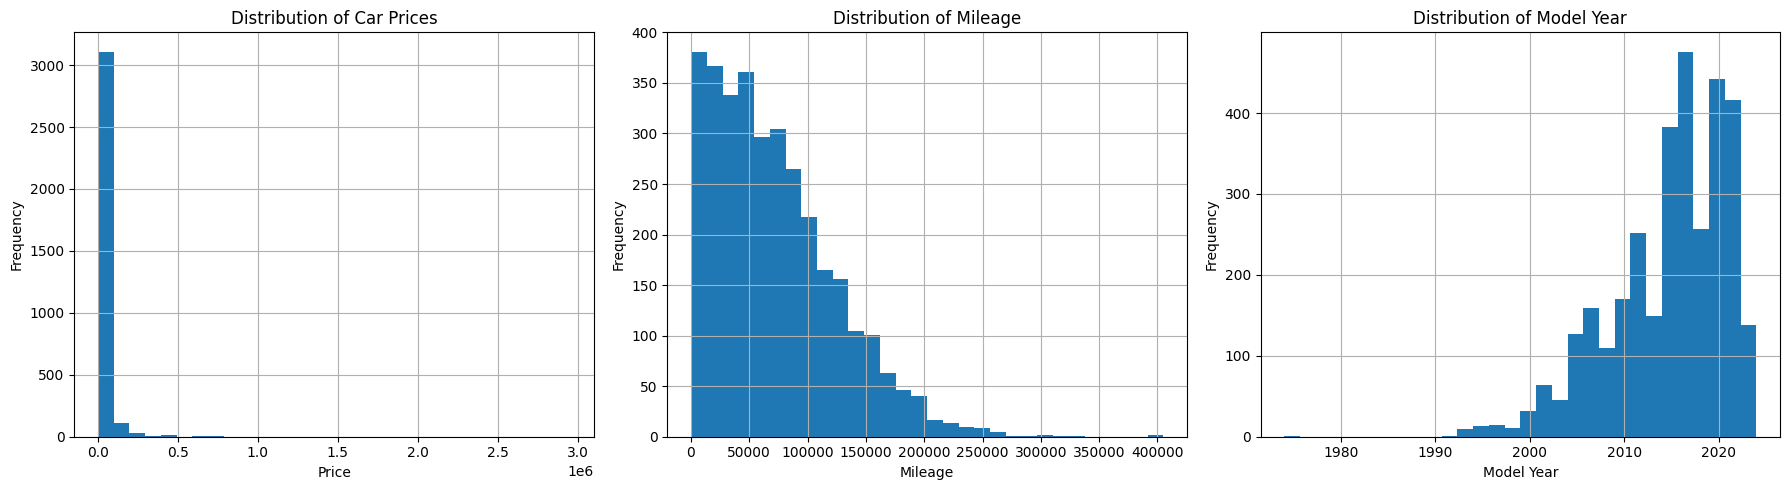

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis - Histograms

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cp['price'].hist(ax=axes[0], bins=30)
axes[0].set_title("Distribution of Car Prices")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency")

cp['milage'].hist(ax=axes[1], bins=30)
axes[1].set_title("Distribution of Mileage")
axes[1].set_xlabel("Mileage")
axes[1].set_ylabel("Frequency")

cp['model_year'].hist(ax=axes[2], bins=30)
axes[2].set_title("Distribution of Model Year")
axes[2].set_xlabel("Model Year")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

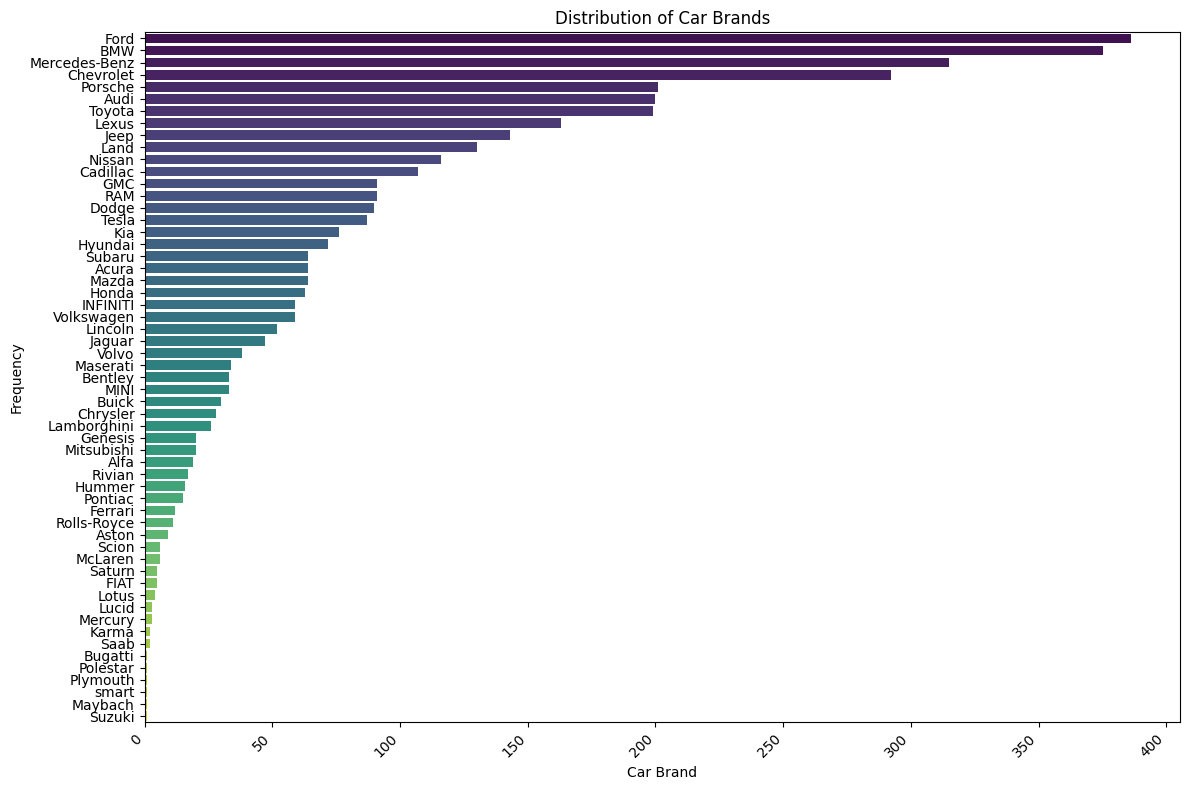

In [6]:
# Count plot for car brand distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Plot for Car Brand
plt.figure(figsize=(12, 8))
sns.countplot(y='brand', data=cp, order=cp['brand'].value_counts().index, palette="viridis")
plt.title("Distribution of Car Brands")
plt.xlabel("Car Brand")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

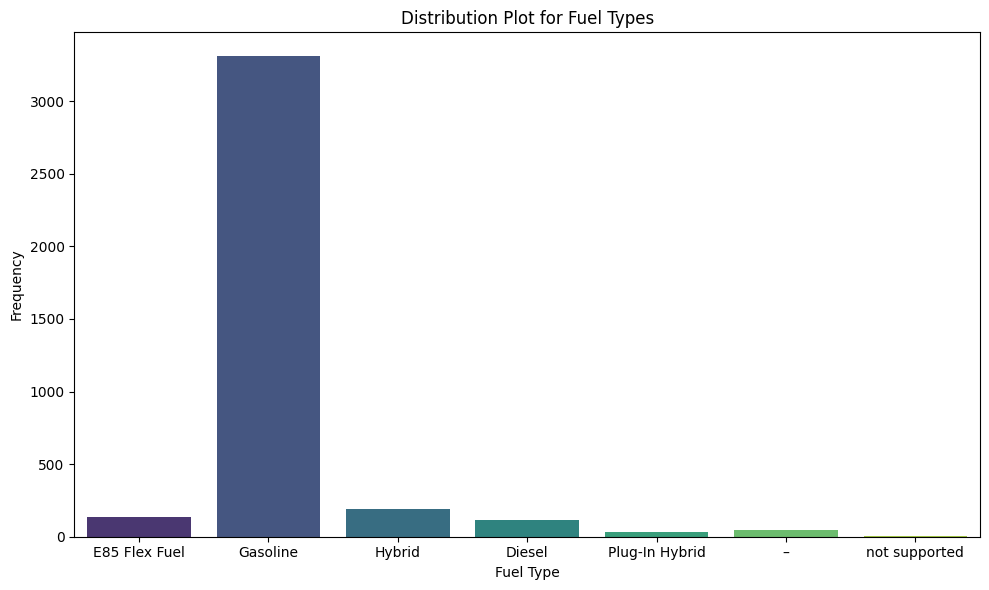

In [7]:
# Count plot for fuel types

plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=cp, palette="viridis")
plt.title("Distribution Plot for Fuel Types")
plt.xlabel("Fuel Type")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

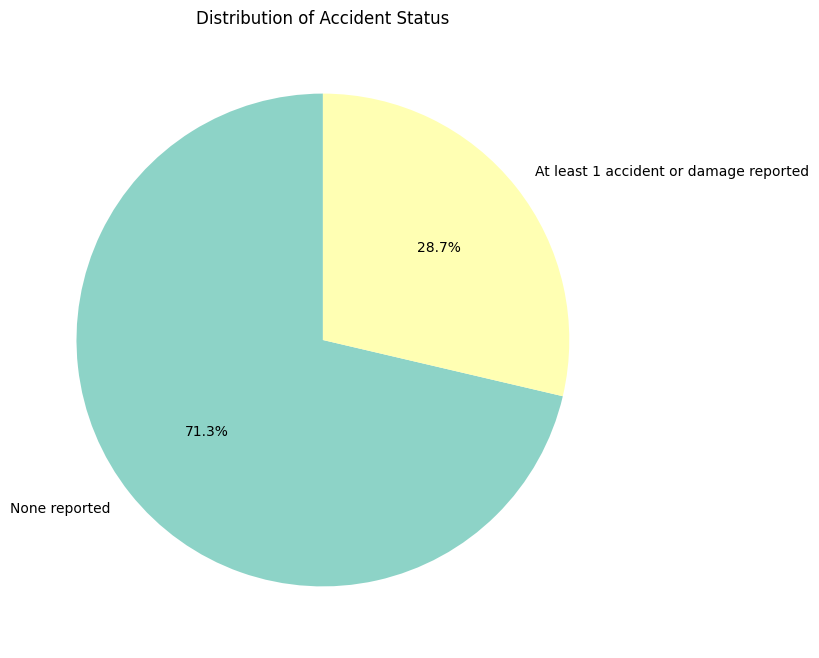

In [30]:
# Pie plot to show the distribution of accident status
plt.figure(figsize=(8, 8))
accident_counts = cp['accident'].value_counts()
accident_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(accident_counts)))
plt.title('Distribution of Accident Status')
plt.ylabel('')
plt.show()

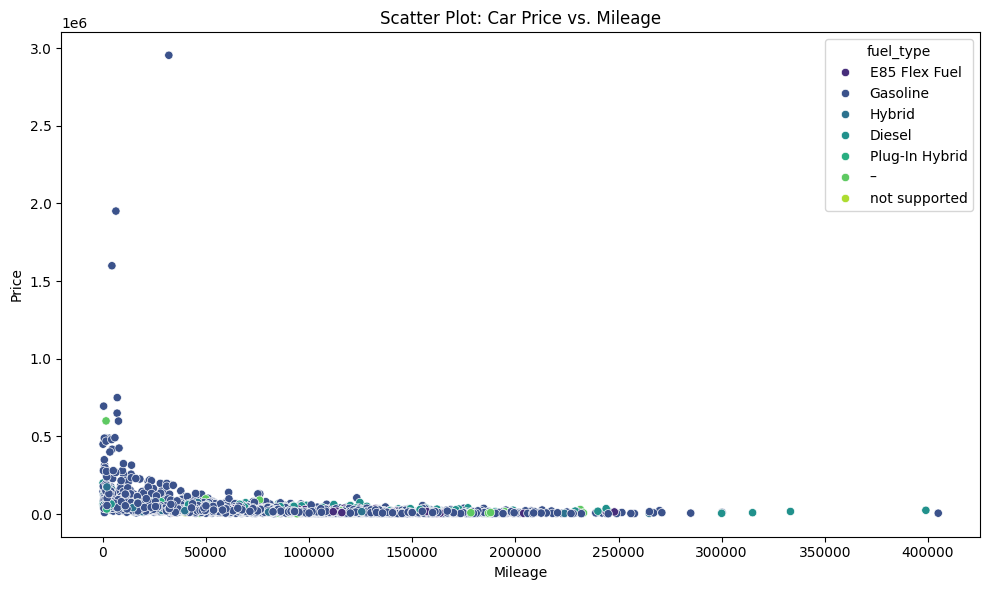

In [26]:
# Bivariate Analysis

# Scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='milage', y='price', data=cp, hue='fuel_type', palette="viridis")
plt.title("Scatter Plot: Car Price vs. Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


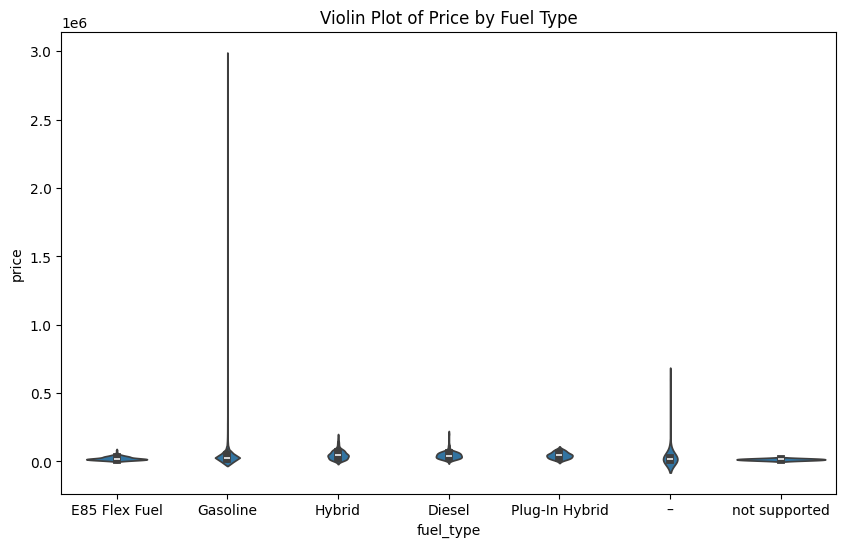

In [51]:
# Violin plot

# to visualize the distribution of 'price' across different 'fuel_type'

plt.figure(figsize=(10, 6))
sns.violinplot(x='fuel_type', y='price', data=cp)
plt.title('Violin Plot of Price by Fuel Type')
plt.show()

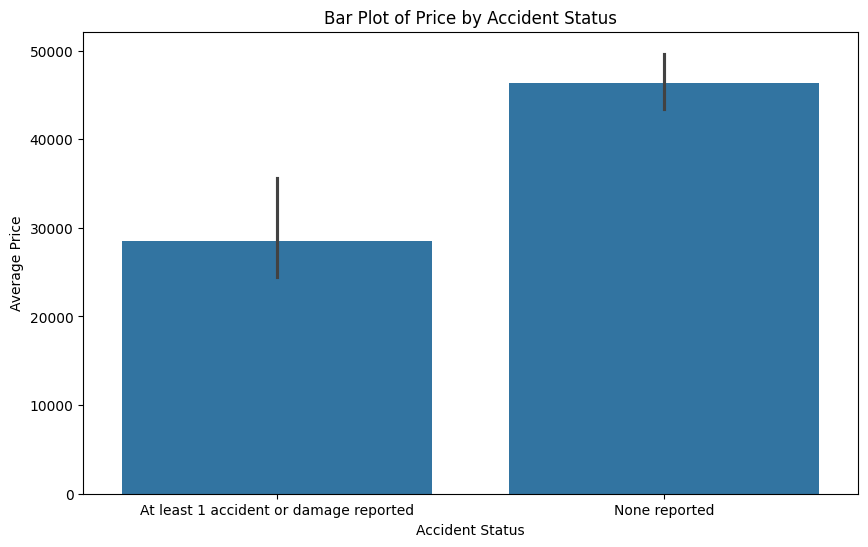

In [53]:
# Bar plot of Price by Accident Status to see how accidents impact car prices
plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=cp)
plt.title('Bar Plot of Price by Accident Status')
plt.ylabel('Average Price')
plt.xlabel('Accident Status')
plt.show()

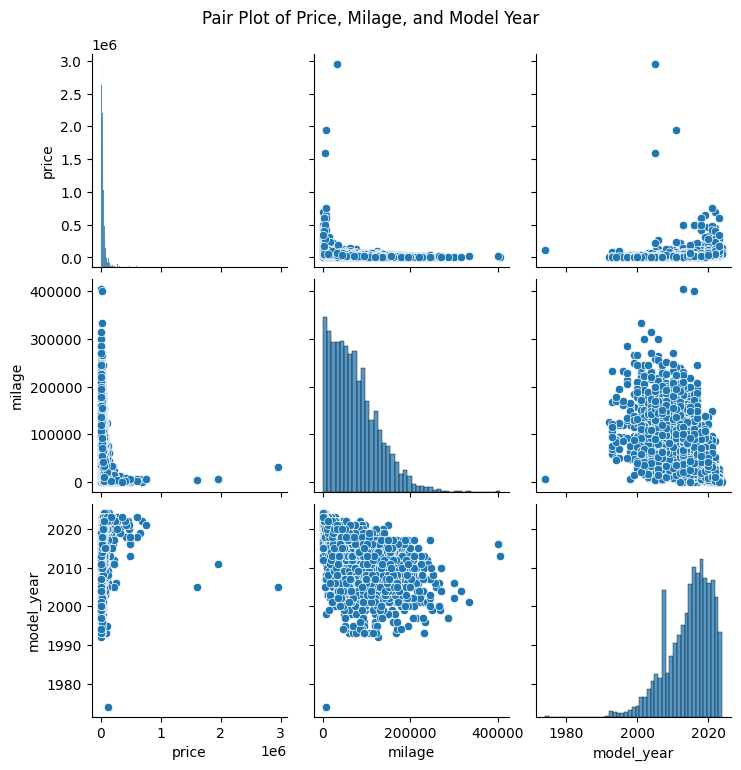

In [45]:
# Pair plot

# Pair plot to visualize relationships between all numerical variables
sns.pairplot(cp[['price', 'milage', 'model_year']])
plt.suptitle('Pair Plot of Price, Milage, and Model Year', y=1.02)
plt.show()

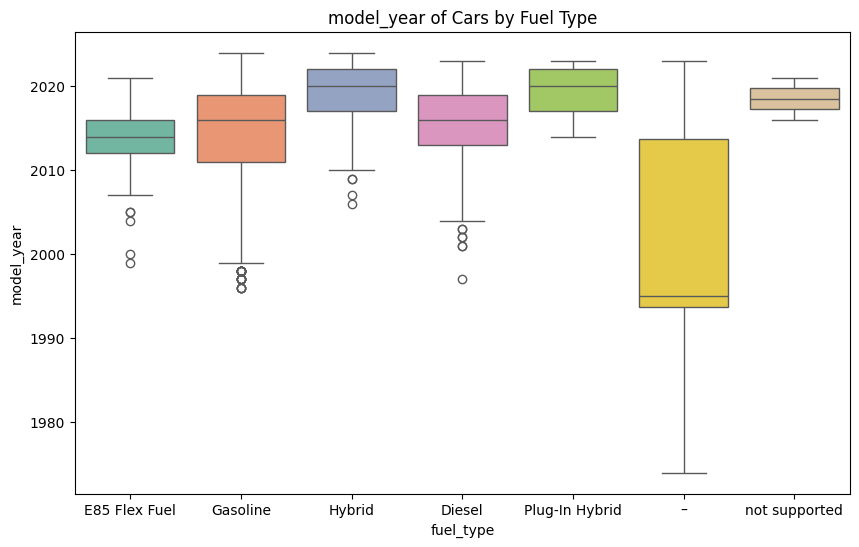

In [44]:
# Box Plot Model_year by Fuel Type distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='model_year', data=cp, palette='Set2')
plt.title('model_year of Cars by Fuel Type')
plt.show()

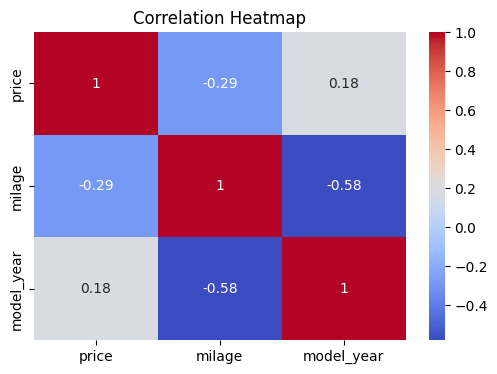

In [25]:
# Multivariate Analysis

# Correlation Heatmap

# Correlation Matrix (numerical features)
corr_matrix = cp[['price', 'milage', 'model_year']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Preprocessing of Data**

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np


# Clean 'price' and 'milage'
cp['price'] = cp['price'].replace('[\$,]', '', regex=True).astype(float)
cp['milage'] = cp['milage'].astype(str).str.replace(' mi.', '', regex=False).str.replace(',', '')
cp['milage'] = pd.to_numeric(cp['milage'], errors='coerce')

# Drop rows with missing essential values
cp.dropna(subset=['price', 'milage', 'fuel_type', 'accident', 'clean_title'], inplace=True)
cp.drop_duplicates(inplace=True)

# Feature Engineering
cp['car_age'] = 2025 - cp['model_year']
categorical_cols = ['fuel_type', 'transmission', 'brand']
numerical_cols = ['milage', 'car_age']
y = cp['price']
X = cp[categorical_cols + numerical_cols]

# Use OneHotEncoder without sparse argument
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Fit and transform
X_processed = preprocessor.fit_transform(X)
X_processed = X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed

# Get feature names
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([numerical_cols, encoded_feature_names])

# Display the first 5 rows
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)
print(X_processed_df.head())


     milage   car_age  fuel_type_E85 Flex Fuel  fuel_type_Gasoline  \
0 -0.395790  0.260339                      1.0                 0.0   
1 -0.700365 -1.040212                      0.0                 1.0   
2  0.314224 -0.064799                      0.0                 0.0   
3  0.222428 -0.389936                      0.0                 1.0   
4  3.182380  2.211165                      0.0                 1.0   

   fuel_type_Hybrid  fuel_type_Plug-In Hybrid  fuel_type_not supported  \
0               0.0                       0.0                      0.0   
1               0.0                       0.0                      0.0   
2               1.0                       0.0                      0.0   
3               0.0                       0.0                      0.0   
4               0.0                       0.0                      0.0   

   fuel_type_–  transmission_10-Speed Automatic  transmission_4-Speed A/T  \
0          0.0                              0.0          

# **Data Splitting (Ratio of 80:20)**

In [7]:
from sklearn.model_selection import train_test_split

# Data Splitting

# Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((2615, 90), (654, 90), (2615,), (654,))

# **Model Building, Training and Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Model Building

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, verbosity=0)


# Model Training

# Fit models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


# Model Evaluation ( on test data)

# Predict
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)


In [ ]:
# Combine and display results
results_df = pd.DataFrame(
    [lr_scores, rf_scores, xgb_scores],
    index=['Linear Regression', 'Random Forest', 'XGBoost']
)

# Display results
print("Model Evaluation Results")
print(results_df)


Model Evaluation Results
                            MAE           RMSE        R2
Linear Regression  19873.572243  117589.430378  0.055759
Random Forest      18118.524858  117077.571859  0.063961
XGBoost            17493.772527  117088.178172  0.063791


# **Model Optimisation - Hyperparameter Tuning using GridSearchCV for both RF and XGBoost**

In [ ]:

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1]
}

# Run GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
rf_best = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_

# Run GridSearchCV for XGBoost with reduced complexity
xgb_grid_search = GridSearchCV(XGBRegressor(random_state=42, verbosity=0), xgb_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)
xgb_best = xgb_grid_search.best_estimator_
xgb_best_params = xgb_grid_search.best_params_

(rf_best_params, xgb_best_params)


({'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200},
 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100})

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Define and fit the best Random Forest model
best_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Define and fit the best XGBoost model
best_xgb_model = XGBRegressor(
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    random_state=42,
    verbosity=0
)
best_xgb_model.fit(X_train, y_train)

# Define the evaluation function
def evaluate(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }

# Retrain Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)
rf_pred = best_rf_model.predict(X_test)
xgb_pred = best_xgb_model.predict(X_test)

# Evaluate
lr_scores = evaluate(y_test, lr_pred)
rf_scores = evaluate(y_test, rf_pred)
xgb_scores = evaluate(y_test, xgb_pred)

# Combine results
results_df = pd.DataFrame(
    [lr_scores, rf_scores, xgb_scores],
    index=['Linear Regression', 'Best Random Forest', 'Best XGBoost']
)

# Print results
print("Model Evaluation Results After Optimization:\n")
print(results_df)


Model Evaluation Results After Optimization:

                         MAE      RMSE        R2
Linear Regression   0.322291  0.425099  0.720178
Best Random Forest  0.331989  0.417521  0.730065
Best XGBoost        0.314832  0.401397  0.750512


# **Features that most influence car price**

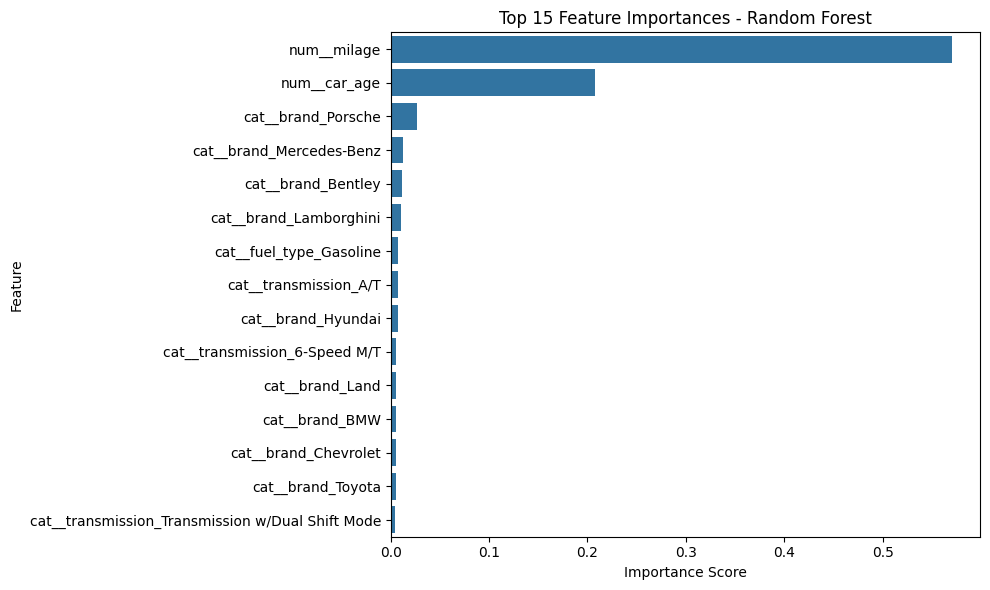

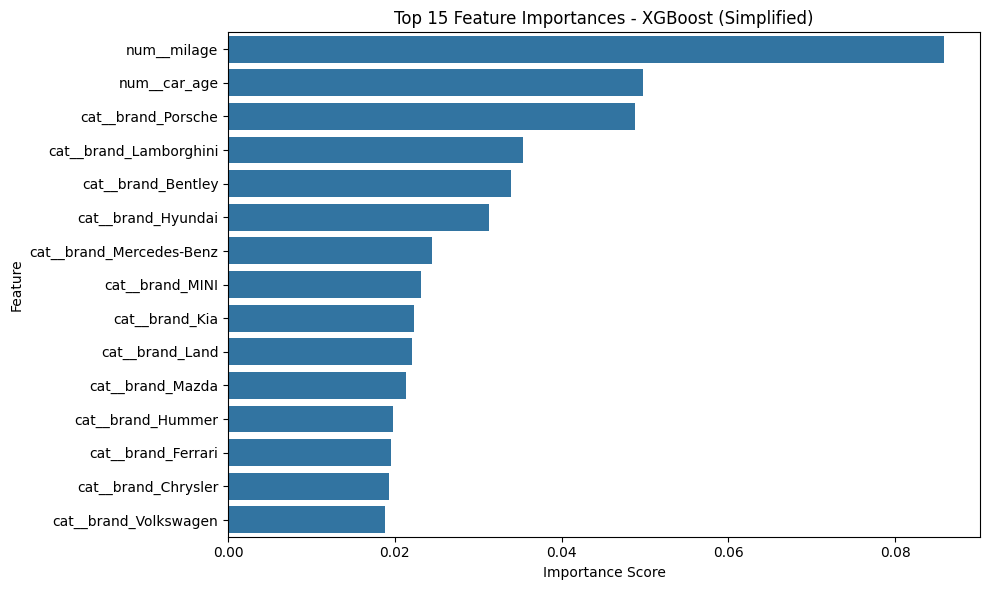

In [ ]:
# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Feature Importances
rf_importances = pd.Series(best_rf_model.feature_importances_, index=feature_names).sort_values(ascending=False).head(15)
xgb_importances = pd.Series(best_xgb_model.feature_importances_, index=feature_names).sort_values(ascending=False).head(15)

# Plot RF Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances.values, y=rf_importances.index)
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Plot XGB Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importances.values, y=xgb_importances.index)
plt.title("Top 15 Feature Importances - XGBoost (Simplified)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
